<a href="https://colab.research.google.com/github/DineshThanneeru2021/Python-Project/blob/main/Face_Emotion_Detection_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2

In [ ]:
pip install opencv-python

In [ ]:
pip install deepface

In [ ]:
img=cv2.imread('happyboy.jpg')
import matplotlib.pyplot as plt

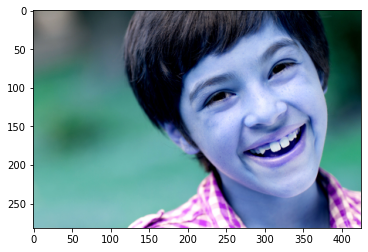

In [14]:
plt.imshow(img)

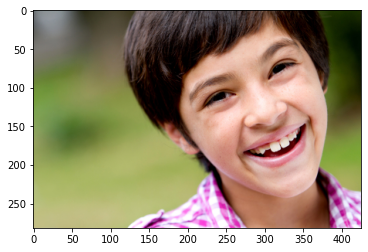

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [18]:
from deepface import DeepFace 

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [36]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


In [37]:
predictions

[{'emotion': {'angry': 1.7522767779707744e-14,
   'disgust': 1.548503863917307e-29,
   'fear': 1.1408437042033711e-18,
   'happy': 99.99995231628418,
   'sad': 2.415714672163215e-14,
   'surprise': 2.2802557064771634e-08,
   'neutral': 4.9575794491829583e-05},
  'dominant_emotion': 'happy',
  'region': {'x': 177, 'y': 11, 'w': 223, 'h': 223},
  'age': 23,
  'gender': {'Woman': 1.9018249586224556, 'Man': 98.0981707572937},
  'dominant_gender': 'Man',
  'race': {'asian': 4.768752306699753,
   'indian': 1.6280537471175194,
   'black': 0.11933955829590559,
   'white': 47.605666518211365,
   'middle eastern': 12.90125846862793,
   'latino hispanic': 32.97693431377411},
  'dominant_race': 'white'}]

In [45]:
type(predictions)

list

In [46]:
predictions[0]['dominant_emotion']

'happy'

In [47]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [48]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)


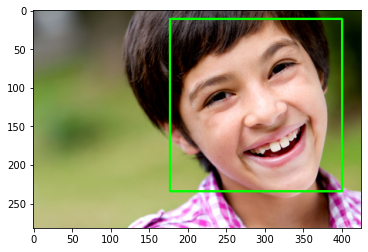

In [49]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,predictions[0]['dominant_emotion'],(0,50),font,1,(0,0,255),2,cv2.LINE_4)

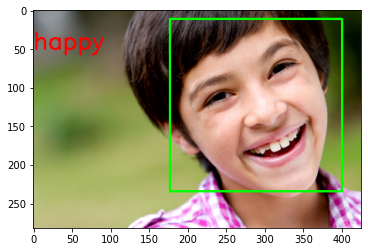

In [52]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
import cv2

from deepface import DeepFace

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(1) # check the webcam opened or not

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the webcam")

while True:
    ret,frame=cap.read()
    
    result=DeepFace.analyze(frame,actions = ['emotion'],enforce_detection="false")
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    # draw rectangle
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    
    # text insertion
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,result[0]['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    
    cv2.imshow('Demo video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()